O seguinte notebook tem como objetivo estimar o tamanho da amostra para iniciar o experimento do estudo da evasão escolar do curso Bacharel em Estatística da UFRGS.
O projeto teve iniciativa devido a um TCC relacionado ao tema.


Link do TCC: https://lume.ufrgs.br/bitstream/handle/10183/198131/000188649.pdf?sequence=1


"A evasão é um problema que merece ser estudado com profundidade, tanto pelo aspecto pedagógico envolvido, como econômico e social. Alguns cursos superiores da UFRGS são caracterizados como cursos onde a evasão é grande e preocupante. Diversas causas, identificadas através de pesquisas realizadas pela Universidade, são apontadas: necessidade de trabalhar, incompatibilidade de horário de trabalho e estudo, curso que não correspondeu às expectativas, etc." (Tcc, p. 42).


Neste notebook irei estimar o tamanho da amostra para realizar um teste T de duas caudas a fim de comparar as médias, isto é, existe diferença nas médias das idades dos gêneros dos alunos que evadiram o curso Bacharel em Estatística da UFRGS ?


- $H_o$: As médias das idades dos dois grupos de alunos são iguais.
- $H_a$: As médias das idades dos dois grupos de alunos são diferentes.


Para iniciar a estimação do tamanho da amostra é necessário definir algumas variáveis para estimar o tamanho da amostra, são eles o nível de significância, poder estimado e o tamanho do efeito, utilizando esses três valores é possível estimar o tamanho de uma amostra necessária utilizando as tabelas de "*sample size*".


A principal referência para essa estimação é o livro de Jacob Cohen: https://utstat.utoronto.ca/~brunner/oldclass/378f16/readings/CohenPower.pdf


"The tables in this section use values for the significance criterion, the ES to be detected, and the desired power to determine the sample size. They would therefore be of primary utility in the planning of experiments to provide a basis for the decision as to how many sampling units (n) are to be used. Although decisions about sample size in behavioral science are frequently made by appeal to tradition or precedent, ready availability of data, or intuition (Cohen, 1965, p. 97ff), unless Type II error rate considerations contribute to the decision, they can hardly be rational.", (Cohen, 1988, p. 69).


- "*Significance Criterion (a)*": O nível de significância, alpha.
- "*Effect Size (ES)*": O tamanho do efeito a que se deseja observar, ou seja, quanto maior o efeito da hipótese, menor é a quantidade de amostras necessárias, pois o efeito observado no teste é bem nítido, caso o efeito seja baixo, são necessárias mais amostras para de fato observar essa diferença. Em outras palavras, é uma medida padronizada que quantifica a magnitude da diferença entre dois grupos ou a força da relação entre variáveis. Para calcular a quantidade de amostras é necessário estimar um tamanho do efeito.
- "*Desired Power (DP)*": O poder de um teste estatístico é a probabilidade do teste produzir um resultado que é estatisticamente significativo, para esse caso, geralmente o estatístico escolhe um poder entre 0.8 a 0.9. O poder de um teste é a probabilidade de rejeitar corretamente a hipótese nula quando ela é falsa, além disso, é possível calcular o poder do teste pela escolha do nível de significância para o teste, pelo tamanho do efeito que está sendo medido e pela quantidade de dados disponíveis. Para nosso caso de uso, vamos utilizar o poder definido para calcular a quantidade de amostras.


Para fins de iniciativa irei escolher esses valores:


- $a$: 0.05.
- $ES$: 0.2.
- $DP$: 0.8.


Analisando a tabela para esses valores são necessárias 393 amostras em cada um dos grupos, ou seja, 393 alunos masculinos e femininos do curso de Bacharel em Estatística que saíram do curso, seja por motivo de transferência, abandono, entre outras.


In [ ]:
from IPython.display import Image
import pandas as pd
from statsmodels.stats import power

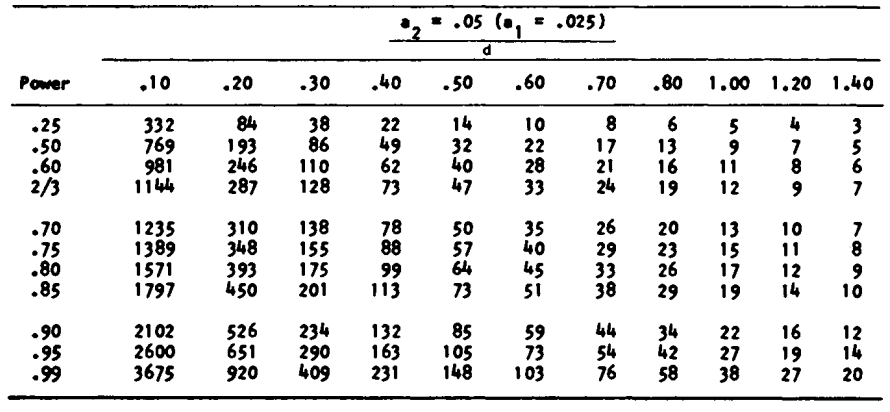

In [2]:
Image("../assets/sample_size_tables.png")

A amostra analisada é constituída por 150 alunos do Curso de Bacharelado em Estatística ingressos no período de 1985 a 1995. Dos 150 alunos pesquisados, 70,1% são do sexo masculino e 29,8% são do sexo feminino.

Os dados foram digitalizados diretamente do TCC não podendo ser coletado mais amostras.

In [3]:
df = pd.read_csv("../dataset/data.csv")
df.columns = ['ingresso', 'genero', 'idade', 'n_aprovacoes', 'n_reprovacoes', 'tempo', 'censura', 'ano_ingresso']

df.head()

,ingresso,genero,idade,n_aprovacoes,n_reprovacoes,tempo,censura,ano_ingresso
0,1,1,26,0,1,5,1,85
1,6,2,21,7,0,6,0,92
2,1,1,32,4,0,12,1,87
3,1,1,18,4,0,3,1,92
4,1,1,24,2,0,17,1,86


In [6]:
dfs = df[df["censura"] == 1]

display(dfs[["genero"]].value_counts() / dfs.shape[0] * 100)

display(dfs[["genero"]].value_counts())

genero
1         70.192308
2         29.807692
Name: count, dtype: float64

genero
1         73
2         31
Name: count, dtype: int64

Foi coletada uma amostra relativamente baixa em comparação com a quantidade de amostras necessárias para se observar o efeito.


Em outras palavras, é possível cair em erros, o Erro Tipo I (ou alfa, α) é a rejeição de uma hipótese nula verdadeira, ou seja, um falso positivo. O Erro Tipo II (ou beta, β) é a não rejeição de uma hipótese nula falsa, o que constitui um falso negativo.


Utilizando a classe TTestIndPower do statsmodels é possível obter o mesmo valor de n.


In [20]:
power_info = power.TTestIndPower()

n = int(power_info.solve_power(
    effect_size=0.2,
    power=0.8,
    alpha=0.05,
    alternative="2s"
))

n

393